In [1]:
import nltk
nltk.download('book', quiet=True)
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [2]:
nltk.corpus.gutenberg.fileids()  # 문학작품 샘플

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [3]:
emmar_raw = nltk.corpus.gutenberg.raw("austen-emma.txt")
print(emmar_raw[:1302])

[Emma by Jane Austen 1816]

VOLUME I

CHAPTER I


Emma Woodhouse, handsome, clever, and rich, with a comfortable home
and happy disposition, seemed to unite some of the best blessings
of existence; and had lived nearly twenty-one years in the world
with very little to distress or vex her.

She was the youngest of the two daughters of a most affectionate,
indulgent father; and had, in consequence of her sister's marriage,
been mistress of his house from a very early period.  Her mother
had died too long ago for her to have more than an indistinct
remembrance of her caresses; and her place had been supplied
by an excellent woman as governess, who had fallen little short
of a mother in affection.

Sixteen years had Miss Taylor been in Mr. Woodhouse's family,
less as a governess than a friend, very fond of both daughters,
but particularly of Emma.  Between _them_ it was more the intimacy
of sisters.  Even before Miss Taylor had ceased to hold the nominal
office of governess, the mildness o

In [5]:
from nltk.tokenize import sent_tokenize
print(sent_tokenize(emmar_raw[:1000])[3])  # 문장 리스트 출력

Sixteen years had Miss Taylor been in Mr. Woodhouse's family,
less as a governess than a friend, very fond of both daughters,
but particularly of Emma.


In [6]:
from nltk.tokenize import word_tokenize
print(word_tokenize(emmar_raw[50:100]))  # 단어 리스트 출력

['Emma', 'Woodhouse', ',', 'handsome', ',', 'clever', ',', 'and', 'rich', ',', 'with', 'a']


In [7]:
# 형태소 분석 ; 어간 추출, 원형 복원, 품사 부착
from nltk.stem import PorterStemmer, LancasterStemmer # 어간 추출: 단순 어미 제거
st1 = PorterStemmer()
st2 = LancasterStemmer()

words = ["fly", "flies", "flying", "flew", "flown"]
print("Porter Stemmer    :", [st1.stem(w) for w in words])
print("Lancaster Stemmer :", [st2.stem(w) for w in words])

Porter Stemmer    : ['fli', 'fli', 'fli', 'flew', 'flown']
Lancaster Stemmer : ['fly', 'fli', 'fly', 'flew', 'flown']


In [8]:
# 원형 복원
from nltk.stem import WordNetLemmatizer
lm = WordNetLemmatizer()

[lm.lemmatize(w, pos='v') for w in words]  # pos='v' 품사 지정하면 더 정확한 원형 복원 가능

['fly', 'fly', 'fly', 'fly', 'fly']

In [9]:
# 품사 부착
nltk.help.upenn_tagset("VB")  # 품사에 대한 설명

VB: verb, base form
    ask assemble assess assign assume atone attention avoid bake balkanize
    bank begin behold believe bend benefit bevel beware bless boil bomb
    boost brace break bring broil brush build ...


In [10]:
nltk.help.upenn_tagset("NNP")

NNP: noun, proper, singular
    Motown Venneboerger Czestochwa Ranzer Conchita Trumplane Christos
    Oceanside Escobar Kreisler Sawyer Cougar Yvette Ervin ODI Darryl CTCA
    Shannon A.K.C. Meltex Liverpool ...


In [11]:
nltk.help.upenn_tagset("VBP")

VBP: verb, present tense, not 3rd person singular
    predominate wrap resort sue twist spill cure lengthen brush terminate
    appear tend stray glisten obtain comprise detest tease attract
    emphasize mold postpone sever return wag ...


In [12]:
nltk.help.upenn_tagset("TO")

TO: "to" as preposition or infinitive marker
    to


In [13]:
nltk.help.upenn_tagset("NN")

NN: noun, common, singular or mass
    common-carrier cabbage knuckle-duster Casino afghan shed thermostat
    investment slide humour falloff slick wind hyena override subhumanity
    machinist ...


In [14]:
from nltk.tag import pos_tag  # 품사 부착
sentence = "Emma refused to permit us to obtain the refuse permit"
tagged_list = pos_tag(word_tokenize(sentence))
tagged_list

[('Emma', 'NNP'),
 ('refused', 'VBD'),
 ('to', 'TO'),
 ('permit', 'VB'),
 ('us', 'PRP'),
 ('to', 'TO'),
 ('obtain', 'VB'),
 ('the', 'DT'),
 ('refuse', 'NN'),
 ('permit', 'NN')]

In [16]:
nouns_list = [t[0] for t in tagged_list if t[1] == "NN"]
nouns_list

['refuse', 'permit']

In [17]:
# tag 튜플 제거
from nltk.tag import untag
untag(tagged_list)

['Emma',
 'refused',
 'to',
 'permit',
 'us',
 'to',
 'obtain',
 'the',
 'refuse',
 'permit']

In [18]:
def tokenizer(doc):
    tagged_list = pos_tag(word_tokenize(doc))
    return ["/".join(p) for p in tagged_list]  # 토큰과 품사를 하나의 묶음으로 처리

tokenizer(sentence)

['Emma/NNP',
 'refused/VBD',
 'to/TO',
 'permit/VB',
 'us/PRP',
 'to/TO',
 'obtain/VB',
 'the/DT',
 'refuse/NN',
 'permit/NN']

In [26]:
from nltk import Text
from nltk.tokenize import RegexpTokenizer
pattern = "[\w]+"  # 문자만 추출
retokenize = RegexpTokenizer(pattern)

text = Text(retokenize.tokenize(emmar_raw))

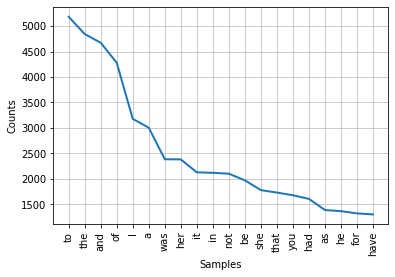

In [27]:
import matplotlib.pylab as plt
%matplotlib inline 

text.plot(20)
plt.show()

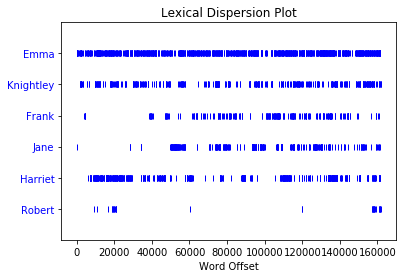

In [28]:
text.dispersion_plot(["Emma", "Knightley", "Frank", "Jane", "Harriet", "Robert"])  # 단어가 사용된 위치 표시

In [29]:
text.concordance("Emma")  #  단어가 어디에 위치하는지 문장에 직접 표시

Displaying 25 of 865 matches:
 Emma by Jane Austen 1816 VOLUME I CHAPTER
 Jane Austen 1816 VOLUME I CHAPTER I Emma Woodhouse handsome clever and rich w
f both daughters but particularly of Emma Between _them_ it was more the intim
nd friend very mutually attached and Emma doing just what she liked highly est
 by her own The real evils indeed of Emma s situation were the power of having
ding day of this beloved friend that Emma first sat in mournful thought of any
going only half a mile from them but Emma was aware that great must be the dif
a day It was a melancholy change and Emma could not but sigh over it and wish 
ll the rest of her life at Hartfield Emma smiled and chatted as cheerfully as 
l be able to tell her how we all are Emma spared no exertions to maintain this
or I have a great regard for you and Emma but when it comes to the question of
a fanciful troublesome creature said Emma playfully That is what you have in y
e few people who could see faults in Emma Woodhouse and th

In [30]:
text.similar("Emma") # emma와 같은 문멕에서 주어진 단어 대신 사용된 횟수가 높은 단어 추출

she it he i harriet you her jane him that me and all they them herself
there but be isabella


In [31]:
text.common_contexts(["Emma", "she"])

but_was and_could that_should said_and which_could whom_knew
which_particularly and_imagined that_could said_i that_began
and_thought do_was but_could than_had said_but manner_was this_could
as_saw possible_could


In [32]:
fd = text.vocab() # 단어의 사용빈도 정보를 담는 인스턴스 생성
type(fd)

nltk.probability.FreqDist

In [34]:
from nltk import FreqDist

stopwords = ["Mr.", "Mrs.", "Miss", "Mr", "Mrs", "Dear"]
emma_tokens = pos_tag(retokenize.tokenize(emmar_raw))
len(emma_tokens)

161983

In [35]:
names_list = [t[0] for t in emma_tokens if t[1] == "NNP" and t[0] not in stopwords] # 위의 리스트(필요없는 단어)를 뺀 명사 추출
names_list

['Jane',
 'Austen',
 'VOLUME',
 'Emma',
 'Woodhouse',
 'Sixteen',
 'Taylor',
 'Woodhouse',
 'Emma',
 'Between',
 'Taylor',
 'Emma',
 'Taylor',
 'Emma',
 'Sorrow',
 'Taylor',
 'Taylor',
 'Emma',
 'Weston',
 'Taylor',
 'A',
 'Isabella',
 'How',
 'Emma',
 'Weston',
 'Taylor',
 'Woodhouse',
 'Her',
 'London',
 'October',
 'November',
 'Hartfield',
 'Christmas',
 'Isabella',
 'Highbury',
 'Hartfield',
 'Taylor',
 'Emma',
 'Matrimony',
 'Taylor',
 'Taylor',
 'Hartfield',
 'Emma',
 'Poor',
 'Taylor',
 'Weston',
 'Weston',
 'Taylor',
 'A',
 'How',
 'Randalls',
 'No',
 'James',
 'Weston',
 'Weston',
 'James',
 'Randalls',
 'Hannah',
 'Nobody',
 'Hannah',
 'James',
 'James',
 'Whenever',
 'Taylor',
 'Whenever',
 'James',
 'Emma',
 'Knightley',
 'Isabella',
 'Highbury',
 'London',
 'Hartfield',
 'Brunswick',
 'Square',
 'Woodhouse',
 'Knightley',
 'Isabella',
 'Woodhouse',
 'Knightley',
 'Dirty',
 'Look',
 'Well',
 'Who',
 'Ah',
 'Taylor',
 'Tis',
 'Poor',
 'Woodhouse',
 'Taylor',
 'Emma',
 'Emma

In [36]:
fd_names = FreqDist(names_list)
fd_names  # 단어 

FreqDist({'Emma': 830, 'Harriet': 491, 'Weston': 439, 'Knightley': 389, 'Elton': 385, 'Woodhouse': 304, 'Jane': 299, 'Fairfax': 241, 'Churchill': 223, 'Frank': 208, ...})

In [37]:
fd_names.N(), fd_names["Emma"], fd_names.freq("Emma") # 전체 단어수, Emma횟수, 확률

(7863, 830, 0.10555767518758744)

In [39]:
fd_names.most_common(5) # 가장 출현횟수가 높은 단어

[('Emma', 830),
 ('Harriet', 491),
 ('Weston', 439),
 ('Knightley', 389),
 ('Elton', 385)]

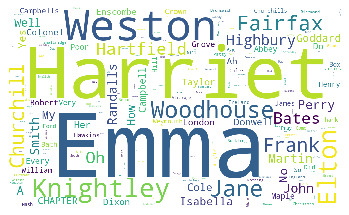

In [40]:
from wordcloud import WordCloud

wc = WordCloud(width=1000, height=600, background_color="white", random_state=0)
plt.imshow(wc.generate_from_frequencies(fd_names))
plt.axis("off")
plt.show()